# Diabetes class prediction


1. [Exploración de los datos](#Exploración-de-los-datos)
2. [Algoritmos ML](#Algoritmos-ML)
3. [Discusión](#Discusión)


## EDA

Let's import all the libraries and load the dataset.

In [1]:
# Import libraries
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import numpy as np
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import RandomOverSampler, SMOTE
import tensorflow as tf

In [2]:
# Load data
diabetes = pd.read_csv("Multiclass Diabetes Dataset.csv")

# Save predictors and target on different datasets
x = diabetes.drop(columns = ['Class'])
y = diabetes[['Class']]

# Check missing data
x.shape
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  264 non-null    int64  
 1   AGE     264 non-null    int64  
 2   Urea    264 non-null    float64
 3   Cr      264 non-null    int64  
 4   HbA1c   264 non-null    float64
 5   Chol    264 non-null    float64
 6   TG      264 non-null    float64
 7   HDL     264 non-null    float64
 8   LDL     264 non-null    float64
 9   VLDL    264 non-null    float64
 10  BMI     264 non-null    float64
dtypes: float64(8), int64(3)
memory usage: 22.8 KB


In [3]:
x.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
1,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0
2,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0
3,0,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0
4,0,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24.0


In [4]:
x.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,0.545455,49.522727,5.671515,85.806818,6.862727,4.594394,2.151894,1.182879,2.530871,1.479167,26.626856
std,0.498875,10.127301,4.002837,99.400047,2.544604,1.289062,1.265841,0.455591,1.000173,3.099856,5.093652
min,0.000000,25.000000,1.100000,6.000000,0.900000,0.000000,0.600000,0.400000,0.300000,0.200000,19.000000
10%,0.000000,33.000000,2.700000,35.000000,4.030000,3.200000,0.900000,0.750000,1.300000,0.500000,21.000000
25%,0.000000,43.000000,3.600000,46.000000,5.000000,3.875000,1.300000,0.900000,1.800000,0.675000,23.000000
50%,1.000000,50.000000,4.700000,61.000000,6.100000,4.500000,1.800000,1.100000,2.500000,0.900000,25.000000
75%,1.000000,55.250000,6.100000,82.250000,8.200000,5.300000,2.725000,1.325000,3.200000,1.300000,30.000000
90%,1.000000,60.000000,9.040000,125.100000,10.800000,6.200000,3.900000,1.700000,3.800000,1.870000,33.000000
max,1.000000,77.000000,26.400000,800.000000,14.600000,9.500000,8.700000,4.000000,5.600000,31.800000,43.250000


We observe that the range of some of these variables are quite broad. This means that it will be interesting to normalize this data in order to implement Neural Networks, k-NN or SVMs, since these algorithms are quite sensible to the magnitudes of each features.

Before that, let's take a look at our data!

<function matplotlib.pyplot.show(close=None, block=None)>

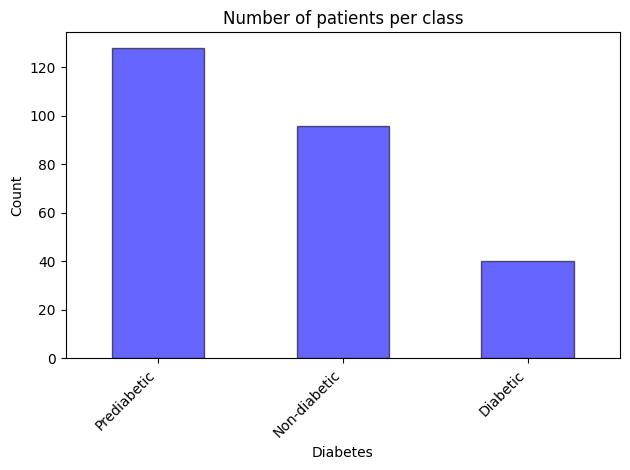

In [5]:
value_mapping = {0: 'Non-diabetic', 1: 'Diabetic', 2:'Prediabetic'}
diabetes['Class'] = diabetes['Class'].replace(value_mapping)
value_mapping2 = {0: 'Female', 1: 'Male'}
diabetes['Gender'] = diabetes['Gender'].replace(value_mapping2)

counts = diabetes['Class'].value_counts()
# Plot
plt.figure()
counts.plot(kind='bar',
            stacked=True,
            color='blue',
            edgecolor='black',
            alpha = 0.6)
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.title('Number of patients per class')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show

We can see that most of our patients in the dataset are pre-diabetic, whereas the diabetic class is the less common. This inbalance might affect the model's performance, since the predictions of the models might be biased. We will check again when assessing the models performance!

When we are presented with imbalanced data, although in this case is not as acute, the accuracy value might not be explaining the whole story, and it is important to take a look at other metrics such as Recall and/or Precision. The Confusion Matrix, along with the ROC might be interesting to check as well!

Let's check if there is any difference in Gender!

<function matplotlib.pyplot.show(close=None, block=None)>

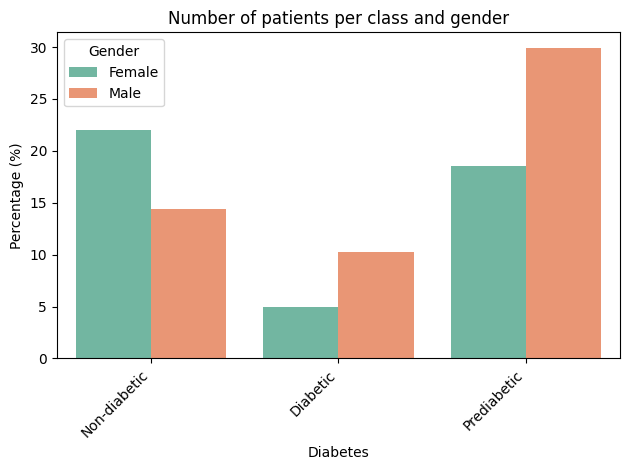

In [6]:
plt.figure()
sns.countplot(data=diabetes, x='Class', hue='Gender',
              stat = 'percent',palette = "Set2")
plt.xlabel('Diabetes')
plt.ylabel('Percentage (%)')
plt.title('Number of patients per class and gender')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show

We can also observe that most of the patients that are either prediabetic or diabetic are males. Most of the healthy patients are women. Let's check the distribution of these 3 classess in the rest of numerical variables!

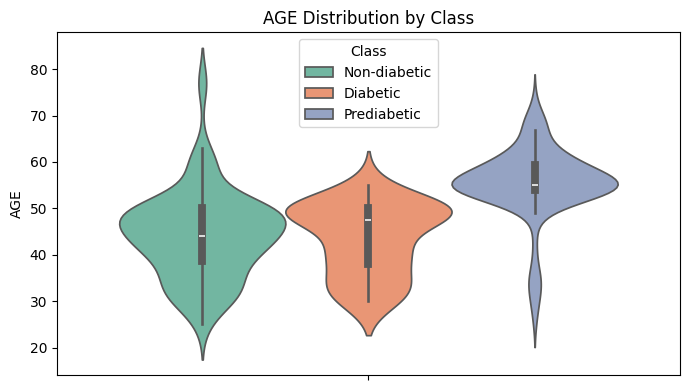

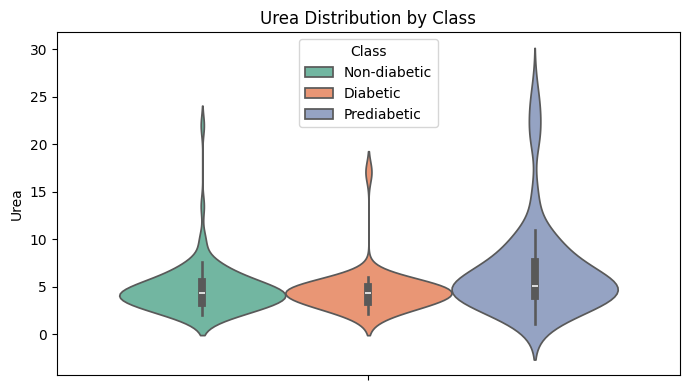

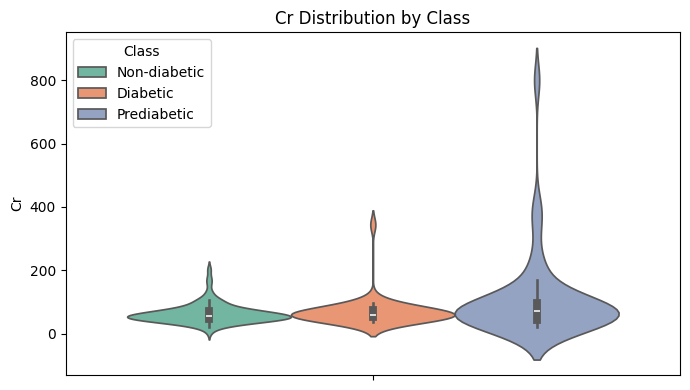

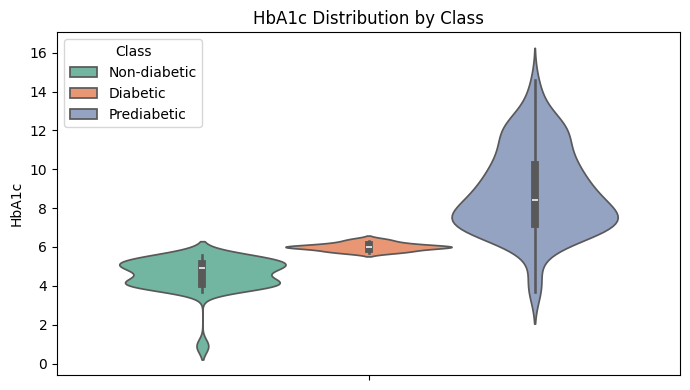

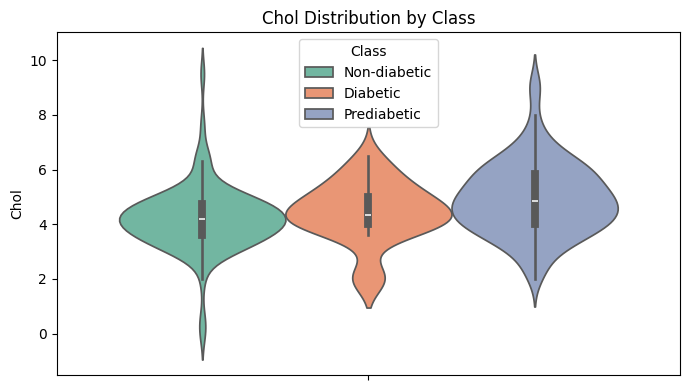

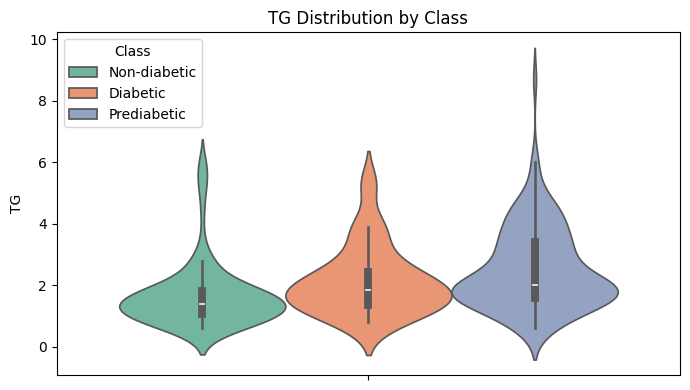

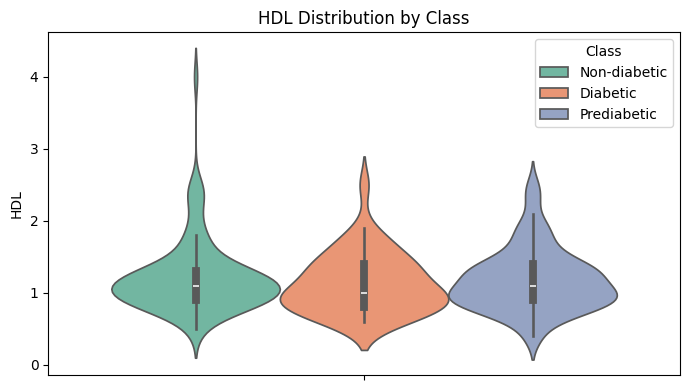

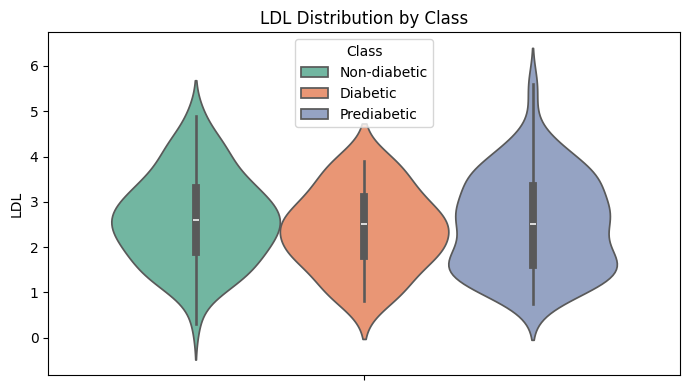

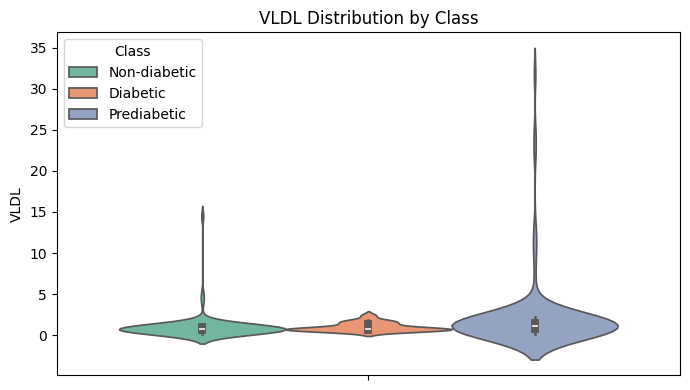

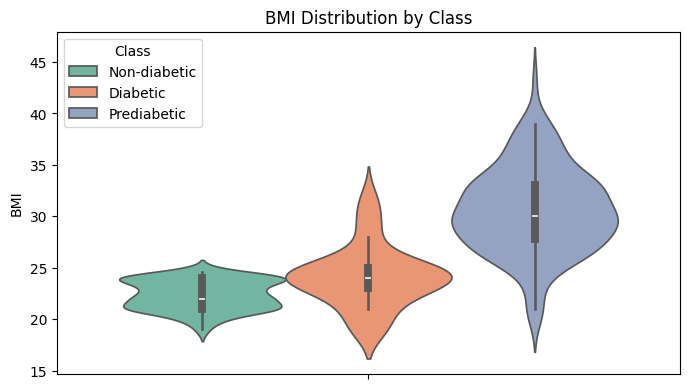

In [7]:
num_vars = diabetes.select_dtypes(include=['int64','float64']).columns
#num_vars = num_vars.drop(['Class','Gender'])
for feature in num_vars:
    plt.figure(figsize=(7, 4))
    sns.violinplot(data=diabetes, hue='Class', y=feature, palette="Set2")
    plt.title(f"{feature} Distribution by Class")
    plt.tight_layout()
    plt.show()

We see that in the diabetic patients have higher HbA1c values, are older and with a higher BMI. Let's check if there are any correlations between the variables.

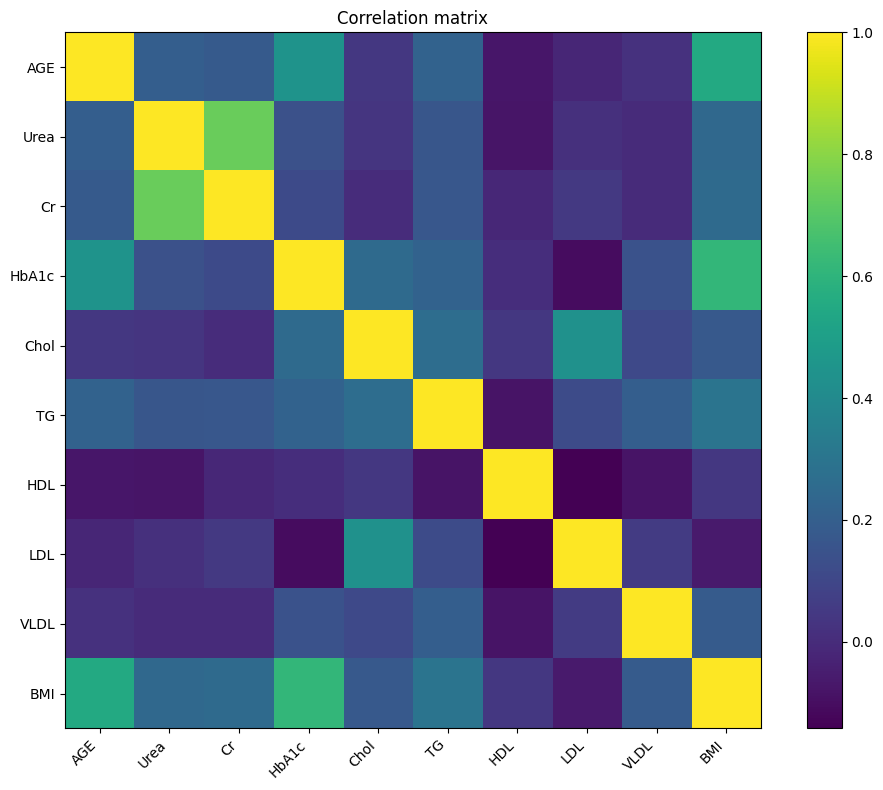

In [8]:
# Correlation matrix
corr = diabetes[num_vars].corr()

# Plot heatmap
fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(corr.values)
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.index)))
ax.set_xticklabels(corr.columns, rotation=45, ha='right')
ax.set_yticklabels(corr.index)
plt.title('Correlation matrix')
plt.colorbar(im)
plt.tight_layout()
plt.show()

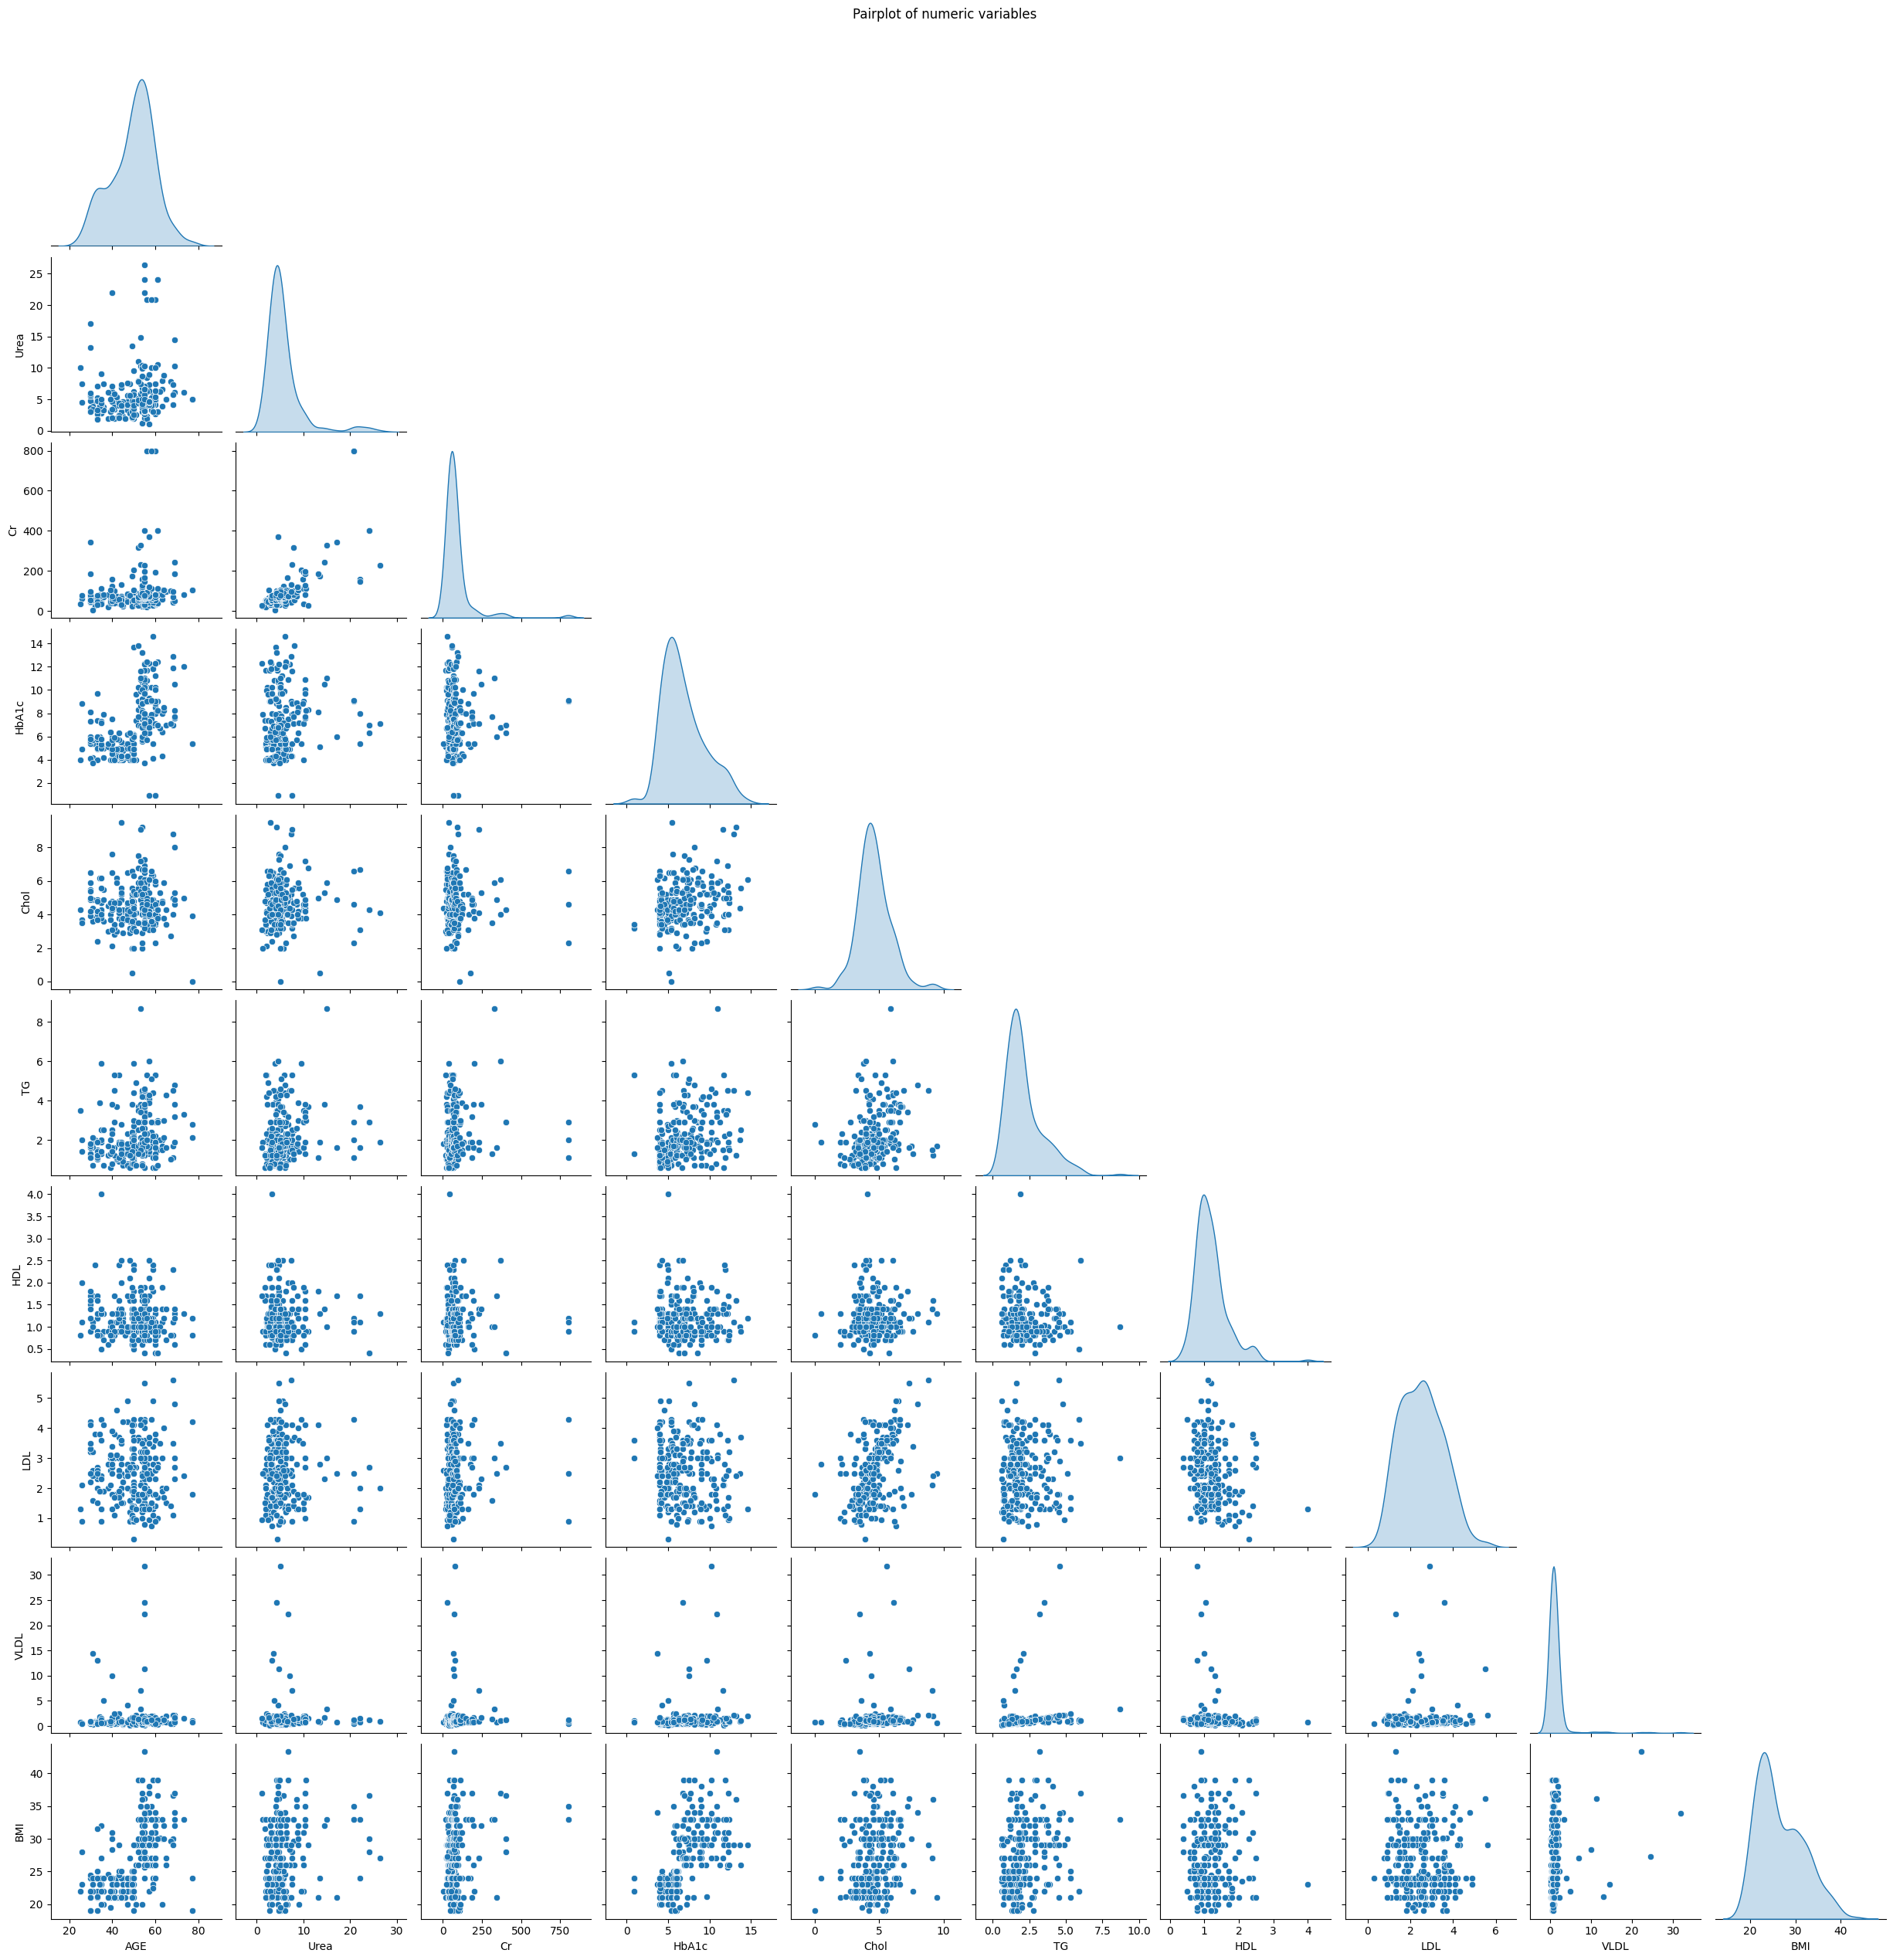

In [9]:
sns.pairplot(diabetes[num_vars], diag_kind="kde", corner=True)
plt.suptitle("Pairplot of numeric variables", y=1.02)
plt.show()

## Scale data

Let's scale the variables using a min-max function. This will improve some algorithm's performance! For this project, we can perform the min-max function for normalization, which will take the full range of a variable and convert it to a range between 0 and 1.

In [10]:
# MinMax Normalization

for column in x.columns:
    col_min = x[column].min()
    col_max = x[column].max()
    x[column] = (x[column] - col_min) / (col_max - col_min)

x.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,0.545455,0.471591,0.180692,0.100512,0.435236,0.483620,0.191592,0.217466,0.420919,0.040480,0.314510
std,0.498875,0.194756,0.158215,0.125189,0.185737,0.135691,0.156277,0.126553,0.188712,0.098097,0.210047
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.153846,0.063241,0.036524,0.228467,0.336842,0.037037,0.097222,0.188679,0.009494,0.082474
25%,0.000000,0.346154,0.098814,0.050378,0.299270,0.407895,0.086420,0.138889,0.283019,0.015032,0.164948
50%,1.000000,0.480769,0.142292,0.069270,0.379562,0.473684,0.148148,0.194444,0.415094,0.022152,0.247423
75%,1.000000,0.581731,0.197628,0.096033,0.532847,0.557895,0.262346,0.256944,0.547170,0.034810,0.453608
90%,1.000000,0.673077,0.313834,0.150000,0.722628,0.652632,0.407407,0.361111,0.660377,0.052848,0.577320
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Split test-training

Let's split our data in the train and test datasets! Since there is a slight imbalance in the classess, let's stratify the split, so we are making sure that the proportion of each class are maintained in both train and test datasets

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    random_state=12345,
                                                    stratify=y)

print('xtrain shape: ', x_train.shape)
print('ytrain shape: ', y_train.shape)
print('xtest shape: ', x_test.shape)
print('ytest shape: ', y_test.shape)

xtrain shape:  (211, 11)
ytrain shape:  (211, 1)
xtest shape:  (53, 11)
ytest shape:  (53, 1)


## Metrics to assess Model Performance

As commented earlier, accuracy values might not be showing properly the performance of the model. Diabetic patients are underrepresented in the dataset, hence, creating a bias that might affect the models' performance.

In order to correctly asses the models performance in these conditions, it is important to not only look at accuracy, but also at Recall and Precision. Precissions provides the number of the true positives (e.g the patients classified as Diabetic or Pre-diabetic that are truly Diabetic) compared to all the positives returned by the model.

On the other hand, Recall is the number of true positives compared to all the positives that are in the dataset. There is a trade-off beteween recall and precission

The F1-score is a metric that combines both metrics. If F1-score value increases from one model to another, this means that Precission and Recall values have optimized.

## Machine Learning Algorithms

Now that we have everything ready, let's build the models!

### k-Nearest Neighbours

Classification Report k= 1 :


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


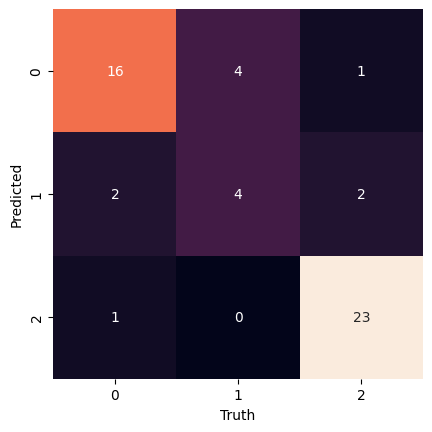

              precision    recall  f1-score   support

           0       0.76      0.84      0.80        19
           1       0.50      0.50      0.50         8
           2       0.96      0.88      0.92        26

    accuracy                           0.81        53
   macro avg       0.74      0.74      0.74        53
weighted avg       0.82      0.81      0.81        53



/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Classification Report k= 3 :


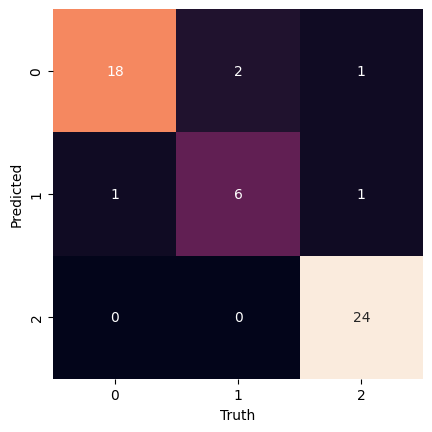

              precision    recall  f1-score   support

           0       0.86      0.95      0.90        19
           1       0.75      0.75      0.75         8
           2       1.00      0.92      0.96        26

    accuracy                           0.91        53
   macro avg       0.87      0.87      0.87        53
weighted avg       0.91      0.91      0.91        53



/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Classification Report k= 5 :


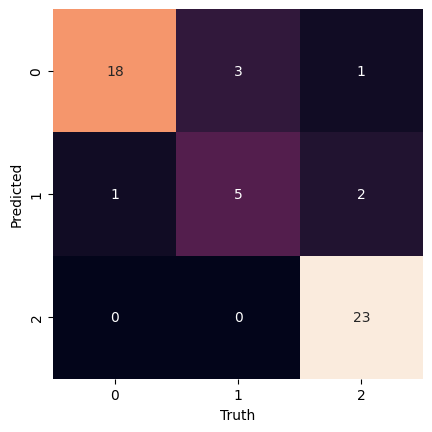

              precision    recall  f1-score   support

           0       0.82      0.95      0.88        19
           1       0.62      0.62      0.62         8
           2       1.00      0.88      0.94        26

    accuracy                           0.87        53
   macro avg       0.81      0.82      0.81        53
weighted avg       0.88      0.87      0.87        53



/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Classification Report k= 7 :


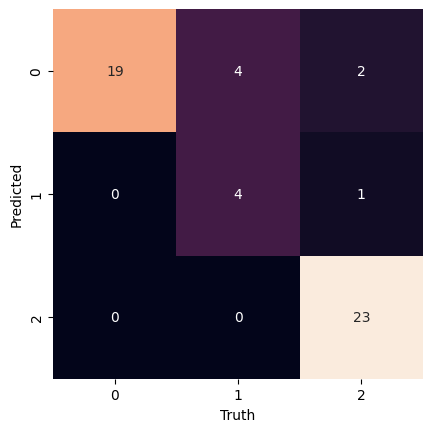

              precision    recall  f1-score   support

           0       0.76      1.00      0.86        19
           1       0.80      0.50      0.62         8
           2       1.00      0.88      0.94        26

    accuracy                           0.87        53
   macro avg       0.85      0.79      0.81        53
weighted avg       0.88      0.87      0.86        53



/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Classification Report k= 11 :


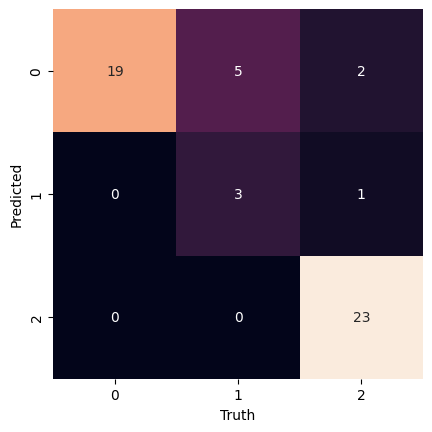

              precision    recall  f1-score   support

           0       0.73      1.00      0.84        19
           1       0.75      0.38      0.50         8
           2       1.00      0.88      0.94        26

    accuracy                           0.85        53
   macro avg       0.83      0.75      0.76        53
weighted avg       0.87      0.85      0.84        53



In [12]:
# Dictionary to store the results for each k
scores_kNN = {}

# Let's test a few k values
k_values = [1,3,5,7,11]
for k in k_values:
    classifier = KNeighborsClassifier(n_neighbors=k)                    # Initialize
    classifier.fit(x_train, y_train)                                    # Fit
    pred = classifier.predict(x_test)                                   # Predict
    scores_kNN[k] = metrics.accuracy_score(y_test,pred)
    names = np.unique(pred)
    mat = confusion_matrix(pred, y_test)
    sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
    plt.xlabel('Truth')
    plt.ylabel('Predicted')
    result1 = metrics.classification_report(y_test, pred)
    print("Classification Report k=",k,":")
    plt.show()
    print(result1)

Apprently, the best accuracy result was por k = 3 with almost a 80%. However, as commented earlier, the underrepresentation of Class #1 (Diabetic) shows poor results for Recall and Precission, even if the global accuracy was quite high.


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Classification Report k= 3


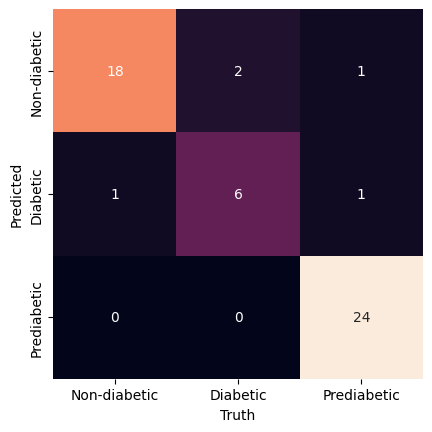

              precision    recall  f1-score   support

           0       0.86      0.95      0.90        19
           1       0.75      0.75      0.75         8
           2       1.00      0.92      0.96        26

    accuracy                           0.91        53
   macro avg       0.87      0.87      0.87        53
weighted avg       0.91      0.91      0.91        53



In [13]:
scores = {}
f1 = {}

classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(x_train, y_train)
pred = classifier.predict(x_test)
scores['k-NN (k = 3)'] = metrics.accuracy_score(y_test,pred)
f1['k-NN (k = 3)'] = metrics.f1_score(y_test,pred,average='macro')    #lets keep macro avg
                                                                      # because of slight imbalance
mat = confusion_matrix(pred, y_test)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
        xticklabels=['Non-diabetic', 'Diabetic', 'Prediabetic'],
        yticklabels=['Non-diabetic', 'Diabetic', 'Prediabetic'])
plt.xlabel('Truth')
plt.ylabel('Predicted')
result1 = metrics.classification_report(y_test, pred)
print("Classification Report k= 3")
plt.show()
print(result1)

### Naive Bayes

Classification Report: 

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        19
           1       1.00      0.88      0.93         8
           2       0.92      0.92      0.92        26

    accuracy                           0.91        53
   macro avg       0.92      0.90      0.91        53
weighted avg       0.91      0.91      0.91        53



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


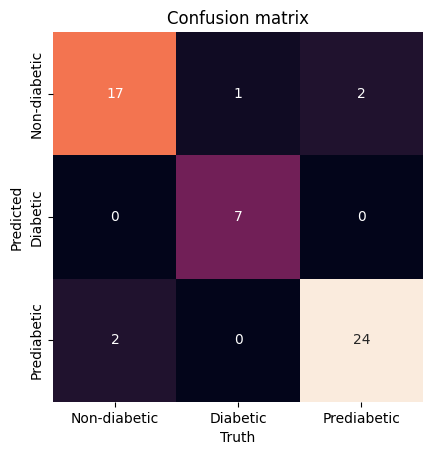

<Figure size 800x600 with 0 Axes>

In [14]:
model = GaussianNB()
model.fit(x_train, y_train)
GaussianNB(var_smoothing=1e-09)
y_pred = model.predict(x_test)

mat = confusion_matrix(y_pred, y_test)
scores['Naïve Bayes'] = metrics.accuracy_score(y_test,pred)
f1['Naïve Bayes'] = metrics.f1_score(y_test,pred,average='macro')
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Non-diabetic', 'Diabetic', 'Prediabetic'],
            yticklabels=['Non-diabetic', 'Diabetic', 'Prediabetic'])
plt.title('Confusion matrix')
plt.xlabel('Truth')
plt.ylabel('Predicted')
plt.figure(figsize=(8, 6))

result = metrics.classification_report(y_test, y_pred)
print("Classification Report:","\n")
print (result)

plt.show()

In this case, we see much better values for the F1 score in the Diabetic class, and an even better accuracy

### Artificial Neural Network


Let's create a couple of ANNs. The first one will consist of a single hidden layer, with 15 neurons, and ReLu activation. The final layer will only have 3 neurons, one per class, with a soft-max activation function, which is convenient for multiclass classifications!

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 15)             │           180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            48 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 228 (912.00 B)

 Trainable params: 228 (912.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
6/6 - 2s - 265ms/step - accuracy: 0.3036 - loss: 1.0776 - val_accuracy: 0.2558 - val_loss: 1.0857
Epoch 2/50
6/6 - 0s - 23ms/step - accuracy: 0.3571 - loss: 1.0540 - val_accuracy: 0.3953 - val_loss: 1.0684
Epoch 3/50
6/6 - 0s - 44ms/step - accuracy: 0.4464 - loss: 1.0327 - val_accuracy: 0.4651 - val_loss: 1.0533
Epoch 4/50
6/6 - 0s - 18ms/step - accuracy: 0.4583 - loss: 1.0132 - val_accuracy: 0.4419 - val_loss: 1.0397
Epoch 5/50
6/6 - 0s - 25ms/step - accuracy: 0.4762 - loss: 0.9955 - val_accuracy: 0.4419 - val_loss: 1.0271
Epoch 6/50
6/6 - 0s - 17ms/step - accuracy: 0.4940 - loss: 0.9790 - val_accuracy: 0.4419 - val_loss: 1.0152
Epoch 7/50
6/6 - 0s - 17ms/step - accuracy: 0.5060 - loss: 0.9638 - val_accuracy: 0.4419 - val_loss: 1.0045
Epoch 8/50
6/6 - 0s - 20ms/step - accuracy: 0.5060 - loss: 0.9498 - val_accuracy: 0.4419 - val_loss: 0.9942
Epoch 9/50
6/6 - 0s - 17ms/step - accuracy: 0.5060 - loss: 0.9367 - val_accuracy: 0.4419 - val_loss: 0.9842
Epoch 10/50
6/6 - 0s - 16ms

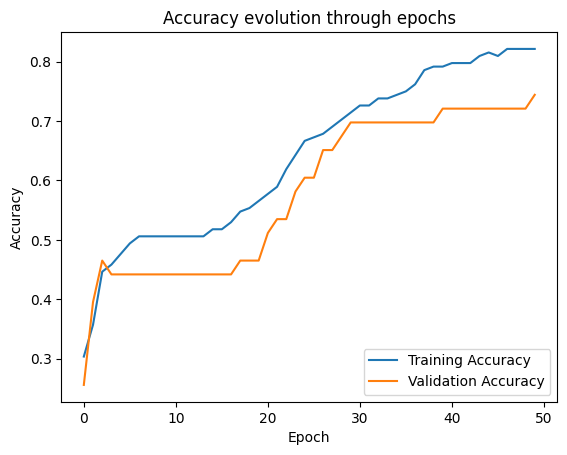

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


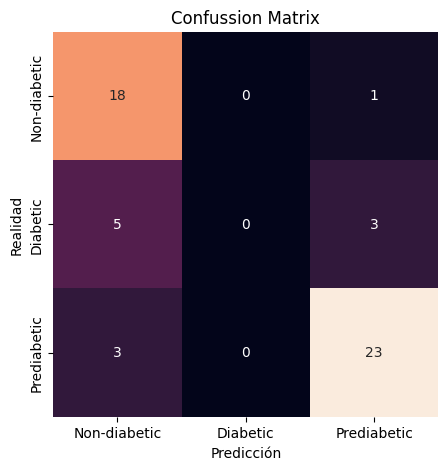

Classification Report:

              precision    recall  f1-score   support

           0       0.69      0.95      0.80        19
           1       0.00      0.00      0.00         8
           2       0.85      0.88      0.87        26

    accuracy                           0.77        53
   macro avg       0.51      0.61      0.56        53
weighted avg       0.67      0.77      0.71        53



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [15]:
np.random.seed(12345)
tf.random.set_seed(12345)

num_features = x_train.shape[1]
num_classes = len(np.unique(y_train))

# Model
model_ANN = Sequential()
model_ANN.add(Dense(15, activation='relu', input_dim=num_features))
model_ANN.add(Dense(num_classes, activation='softmax'))

model_ANN.summary()
model_ANN.compile(optimizer="adam",
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

history = model_ANN.fit(x_train, y_train, epochs=50, validation_split=0.2, verbose=2)

# Learning curve plot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend(loc='lower right')
plt.title('Accuracy evolution through epochs')
plt.show()

# Predict
pred_prob = model_ANN.predict(x_test)
pred = np.argmax(pred_prob, axis=1)

# Confussion Matrix
cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Non-diabetic', 'Diabetic', 'Prediabetic'],
        yticklabels=['Non-diabetic', 'Diabetic', 'Prediabetic'])
plt.title('Confussion Matrix')
plt.xlabel('Predicción'); plt.ylabel('Realidad')
plt.show()

print("Classification Report:\n")
print(classification_report(y_test, pred))


It seems like the algorithm is not predicting correctly the Diabetic class, which is the less common class in the dataset. Since the diabetic observations are underrepresented in the train dataset, the algorithm does have an overall good accuracy even with such a small support for class "diabetes".

Let's try to build a new model. This time, let's force the model to weight some classess underrepresented (such as diabetic).

Class Weights: {0: np.float64(0.9134199134199135), 1: np.float64(2.1979166666666665), 2: np.float64(0.6895424836601307)}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 15)             │           180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            48 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 228 (912.00 B)

 Trainable params: 228 (912.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
6/6 - 1s - 194ms/step - accuracy: 0.5000 - loss: 1.0820 - val_accuracy: 0.4186 - val_loss: 1.0355
Epoch 2/50
6/6 - 0s - 17ms/step - accuracy: 0.5000 - loss: 1.0689 - val_accuracy: 0.4186 - val_loss: 1.0296
Epoch 3/50
6/6 - 0s - 29ms/step - accuracy: 0.5000 - loss: 1.0584 - val_accuracy: 0.4419 - val_loss: 1.0251
Epoch 4/50
6/6 - 0s - 19ms/step - accuracy: 0.5000 - loss: 1.0489 - val_accuracy: 0.4419 - val_loss: 1.0215
Epoch 5/50
6/6 - 0s - 18ms/step - accuracy: 0.5060 - loss: 1.0404 - val_accuracy: 0.4419 - val_loss: 1.0185
Epoch 6/50
6/6 - 0s - 18ms/step - accuracy: 0.5119 - loss: 1.0324 - val_accuracy: 0.4419 - val_loss: 1.0160
Epoch 7/50
6/6 - 0s - 23ms/step - accuracy: 0.5179 - loss: 1.0248 - val_accuracy: 0.4651 - val_loss: 1.0136
Epoch 8/50
6/6 - 0s - 23ms/step - accuracy: 0.5298 - loss: 1.0175 - val_accuracy: 0.5116 - val_loss: 1.0112
Epoch 9/50
6/6 - 0s - 28ms/step - accuracy: 0.5417 - loss: 1.0104 - val_accuracy: 0.5349 - val_loss: 1.0088
Epoch 10/50
6/6 - 0s - 18ms

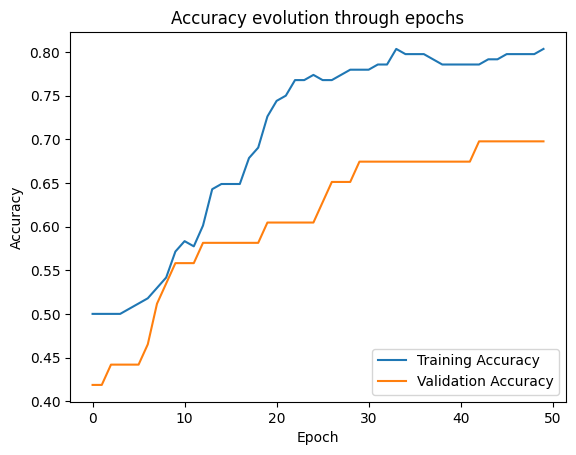

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


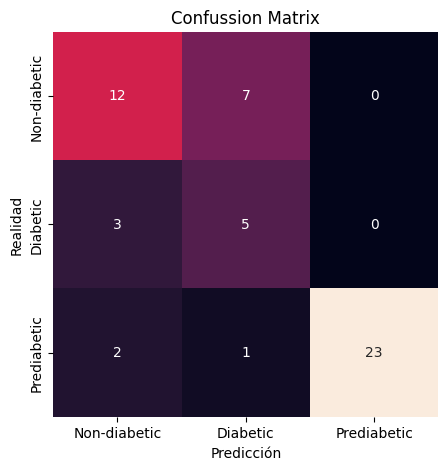

Classification Report:

              precision    recall  f1-score   support

           0       0.71      0.63      0.67        19
           1       0.38      0.62      0.48         8
           2       1.00      0.88      0.94        26

    accuracy                           0.75        53
   macro avg       0.70      0.71      0.69        53
weighted avg       0.80      0.75      0.77        53



In [16]:
from sklearn.utils.class_weight import compute_class_weight

np.random.seed(12345)
tf.random.set_seed(12345)

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train.values.ravel())
class_weight_dict = dict(enumerate(class_weights))
print("Class Weights:", class_weight_dict)


num_features = x_train.shape[1]
num_classes = len(np.unique(y_train))

# Model
model_ANN = Sequential()
model_ANN.add(Dense(15, activation='relu', input_dim=num_features))
model_ANN.add(Dense(num_classes, activation='softmax'))

model_ANN.summary()
model_ANN.compile(optimizer="adam",
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

history = model_ANN.fit(x_train, y_train, epochs=50, validation_split=0.2, verbose=2, class_weight=class_weight_dict)

# Learning curve plot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend(loc='lower right')
plt.title('Accuracy evolution through epochs')
plt.show()

# Predict
pred_prob = model_ANN.predict(x_test)
pred = np.argmax(pred_prob, axis=1)

# Confussion Matrix
cm = confusion_matrix(y_test, pred)
scores['ANN'] = metrics.accuracy_score(y_test,pred)
f1['ANN'] = metrics.f1_score(y_test,pred,average='macro')

plt.figure(figsize=(6,5))
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Non-diabetic', 'Diabetic', 'Prediabetic'],
        yticklabels=['Non-diabetic', 'Diabetic', 'Prediabetic'])
plt.title('Confussion Matrix')
plt.xlabel('Predicción'); plt.ylabel('Realidad')
plt.show()

print("Classification Report:\n")
print(classification_report(y_test, pred))

It seems like the accuracy has increased slightly, as well as the macro average of the F1-score. This is due to the implementation of the weights to each observation, which force the algorithm to provide more value to underrepresented classes. However, the metrics are still slightly poor.

### Support Vector Machine

Antes de trabajar con el algoritmo SVC, en Python es necesario que convirtamos nuestros datos a Arrays de NumPy.

In [17]:
# Convert to NumPy array
x_test_svm = np.array(x_test)
y_test_svm = np.array(y_test)
x_train_svm = np.array(x_train)
y_train_svm = np.array(y_train)

#### Kernel lineal


 Classification Report:
              precision    recall  f1-score   support

           0       0.63      1.00      0.78        19
           1       0.00      0.00      0.00         8
           2       1.00      0.88      0.94        26

    accuracy                           0.79        53
   macro avg       0.54      0.63      0.57        53
weighted avg       0.72      0.79      0.74        53



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning

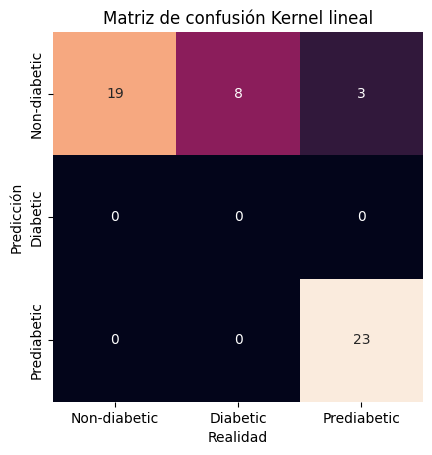

<Figure size 800x600 with 0 Axes>

In [18]:
# Initiate the model
modelo1 = SVC(kernel='linear')
# Fit
modelo1.fit(x_train_svm, y_train_svm)

# Define the parameters
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Predict
pred = modelo1.predict(x_test_svm)

scores['SVM (lineal kernel)'] = metrics.accuracy_score(y_test_svm,pred)
f1['SVM (lineal kernel)'] = metrics.f1_score(y_test,pred,average='macro')

# Confusion matrix
mat = confusion_matrix(pred, y_test_svm)
names = np.unique(pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Non-diabetic', 'Diabetic', 'Prediabetic'],
            yticklabels=['Non-diabetic', 'Diabetic', 'Prediabetic'])
plt.title('Matriz de confusión Kernel lineal')
plt.xlabel('Realidad')
plt.ylabel('Predicción')
plt.figure(figsize=(8, 6))

result = metrics.classification_report(y_test_svm, pred)
print("\n","Classification Report:")
print (result)

#### Kernel RBF

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 Classification Report:
              precision    recall  f1-score   support

           0       0.68      1.00      0.81        19
           1       1.00      0.25      0.40         8
           2       1.00      0.88      0.94        26

    accuracy                           0.83        53
   macro avg       0.89      0.71      0.72        53
weighted avg       0.88      0.83      0.81        53



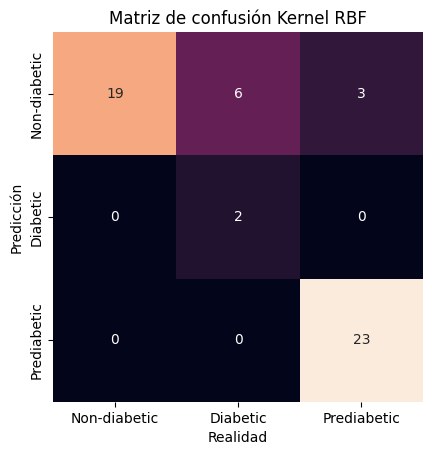

<Figure size 800x600 with 0 Axes>

In [19]:

modelo2 = SVC(kernel='rbf')
modelo2.fit(x_train_svm, y_train_svm)
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
pred2 = modelo2.predict(x_test_svm)
scores['SVM (RBF kernel)'] = metrics.accuracy_score(y_test_svm,pred2)
f1['SVM (RBF kernel)'] = metrics.f1_score(y_test,pred2,average='macro')
mat = confusion_matrix(pred2, y_test_svm)
names = np.unique(pred2)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Non-diabetic', 'Diabetic', 'Prediabetic'],
            yticklabels=['Non-diabetic', 'Diabetic', 'Prediabetic'])
plt.title('Matriz de confusión Kernel RBF')
plt.xlabel('Realidad')
plt.ylabel('Predicción')
plt.figure(figsize=(8, 6))

result = metrics.classification_report(y_test_svm, pred2)
print("\n","Classification Report:")
print (result)

It seems like the RBF Kernel is slightly better, but we've built a few models with better performance. Let's check more models

### Classification tree

#### No boosting

Classification Report: 

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        19
           1       1.00      1.00      1.00         8
           2       0.96      0.96      0.96        26

    accuracy                           0.96        53
   macro avg       0.97      0.97      0.97        53
weighted avg       0.96      0.96      0.96        53



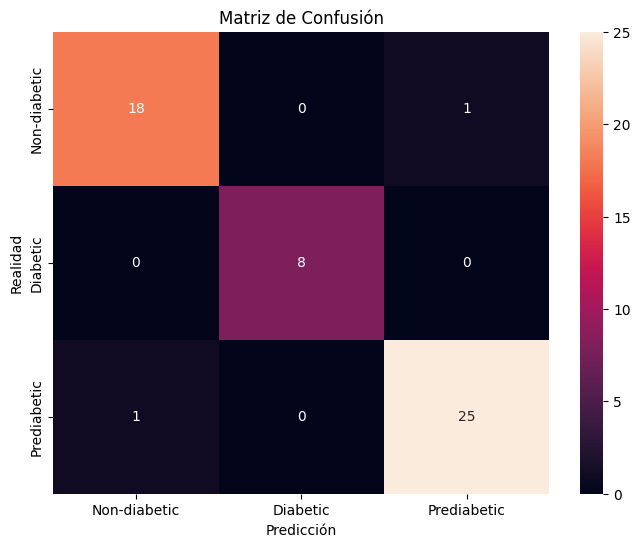

In [20]:
# Initiate, fit and predict
clf = DecisionTreeClassifier(random_state=1)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

scores['Classification tree - no boosting'] = metrics.accuracy_score(y_test,y_pred)
f1['Classification tree - no boosting)'] = metrics.f1_score(y_test,y_pred,average='macro')

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d',
            xticklabels=['Non-diabetic', 'Diabetic', 'Prediabetic'],
            yticklabels=['Non-diabetic', 'Diabetic', 'Prediabetic'])
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Matriz de Confusión')

result = metrics.classification_report(y_test, y_pred)
print("Classification Report:","\n")
print (result)

plt.show()

#### Con boosting

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification Report: 

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        19
           1       1.00      1.00      1.00         8
           2       0.96      0.96      0.96        26

    accuracy                           0.96        53
   macro avg       0.97      0.97      0.97        53
weighted avg       0.96      0.96      0.96        53



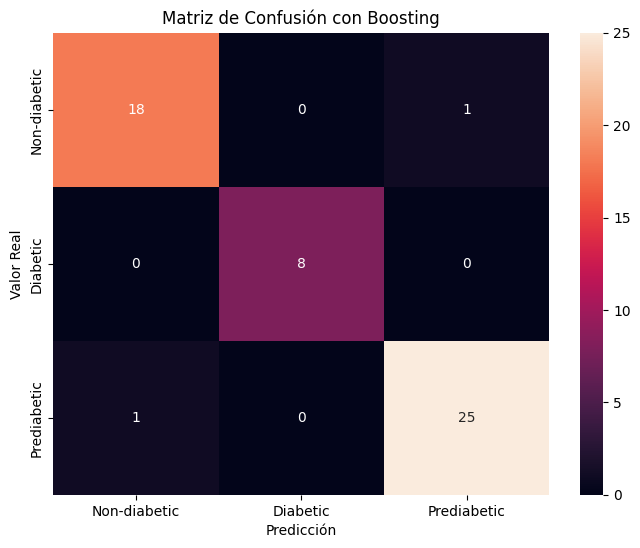

In [21]:
clas = DecisionTreeClassifier(random_state=42)

mod = AdaBoostClassifier(clas, n_estimators=50, random_state=42)
mod.fit(x_train, y_train)
y_pred = mod.predict(x_test)

scores['Classification tree - boosting'] = metrics.accuracy_score(y_test,y_pred)
f1['Classification tree - boosting)'] = metrics.f1_score(y_test,y_pred,average='macro')

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d',
            xticklabels=['Non-diabetic', 'Diabetic', 'Prediabetic'],
            yticklabels=['Non-diabetic', 'Diabetic', 'Prediabetic'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión con Boosting')

result = metrics.classification_report(y_test, y_pred)
print("Classification Report:","\n")
print (result)

plt.show()

It seems that the classification tree has predicted the labels pretty well. It seems there is no difference between applying boosting or not.

### Random forest

#### Random forest n=100

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Classification Report: 

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      1.00      1.00         8
           2       1.00      0.96      0.98        26

    accuracy                           0.98        53
   macro avg       0.98      0.99      0.98        53
weighted avg       0.98      0.98      0.98        53



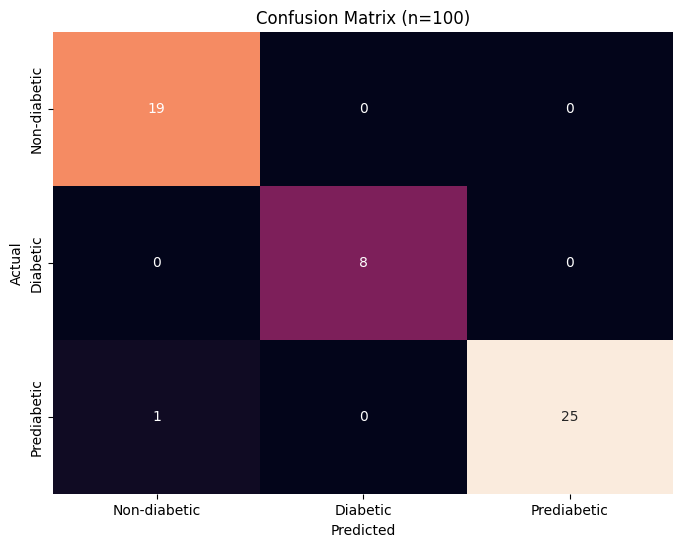

In [22]:
rf_model_100 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_100.fit(x_train, y_train)
y_pred = rf_model_100.predict(x_test)

scores['Random Forest - n = 100'] = metrics.accuracy_score(y_test,y_pred)
f1['Random Forest - n = 100'] = metrics.f1_score(y_test,y_pred,average='macro')

confusion_matrix_100 = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_100, annot=True, fmt='d', cbar=False,
            xticklabels=['Non-diabetic', 'Diabetic', 'Prediabetic'],
            yticklabels=['Non-diabetic', 'Diabetic', 'Prediabetic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (n=100)')

result = metrics.classification_report(y_test, y_pred)
print("Classification Report:","\n")
print (result)

plt.show()

#### Random forest n = 500

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Classification Report: 

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      1.00      1.00         8
           2       1.00      0.96      0.98        26

    accuracy                           0.98        53
   macro avg       0.98      0.99      0.98        53
weighted avg       0.98      0.98      0.98        53



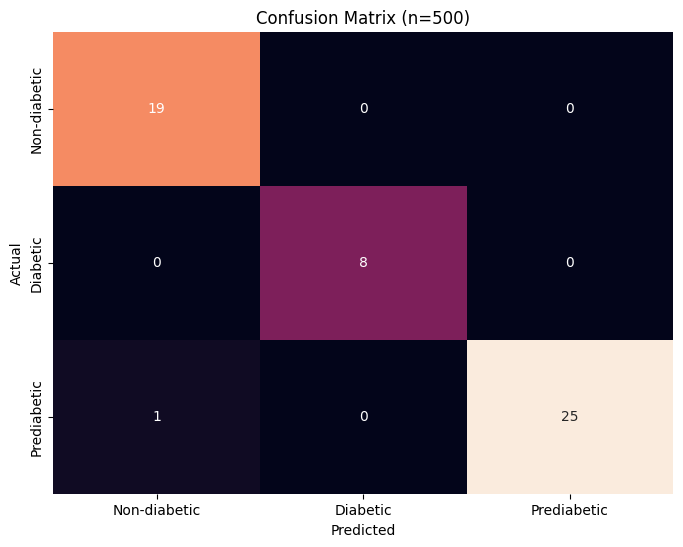

In [23]:
rf_model_500 = RandomForestClassifier(n_estimators=500, random_state=42)
rf_model_500.fit(x_train, y_train)

y_pred = rf_model_500.predict(x_test)
confusion_matrix_500 = confusion_matrix(y_test, y_pred)
scores['Random Forest - n = 500'] = metrics.accuracy_score(y_test,y_pred)
f1['Random Forest - n = 500'] = metrics.f1_score(y_test,y_pred,average='macro')

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_500, annot=True, fmt='d', cbar=False,
            xticklabels=['Non-diabetic', 'Diabetic', 'Prediabetic'],
            yticklabels=['Non-diabetic', 'Diabetic', 'Prediabetic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (n=500)')

result = metrics.classification_report(y_test, y_pred)
print("Classification Report:","\n")
print (result)

plt.show()

Taking a look at Random Forest, the metrics are very impressive. The model is able to predict almost perfectly the classes. Only there are a couple missclassifications, predicted as non-diabetic when the patient is pre-diabetic.

The 500 trees model slightly improves de 100 trees model

## Discussion

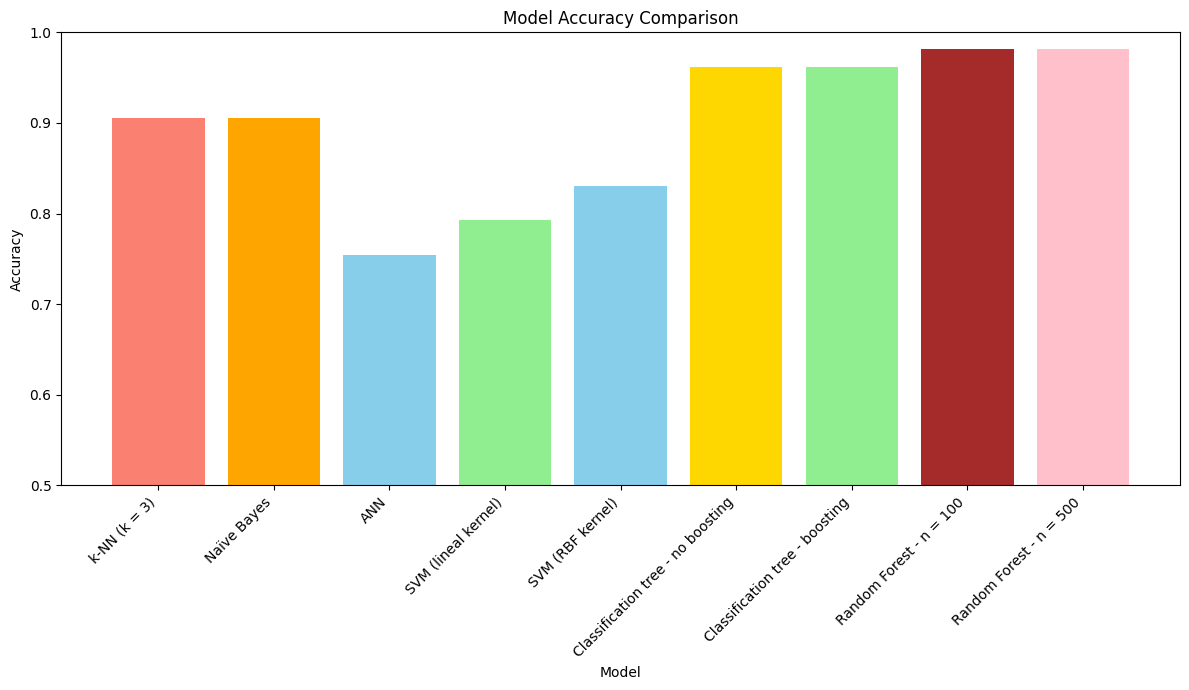

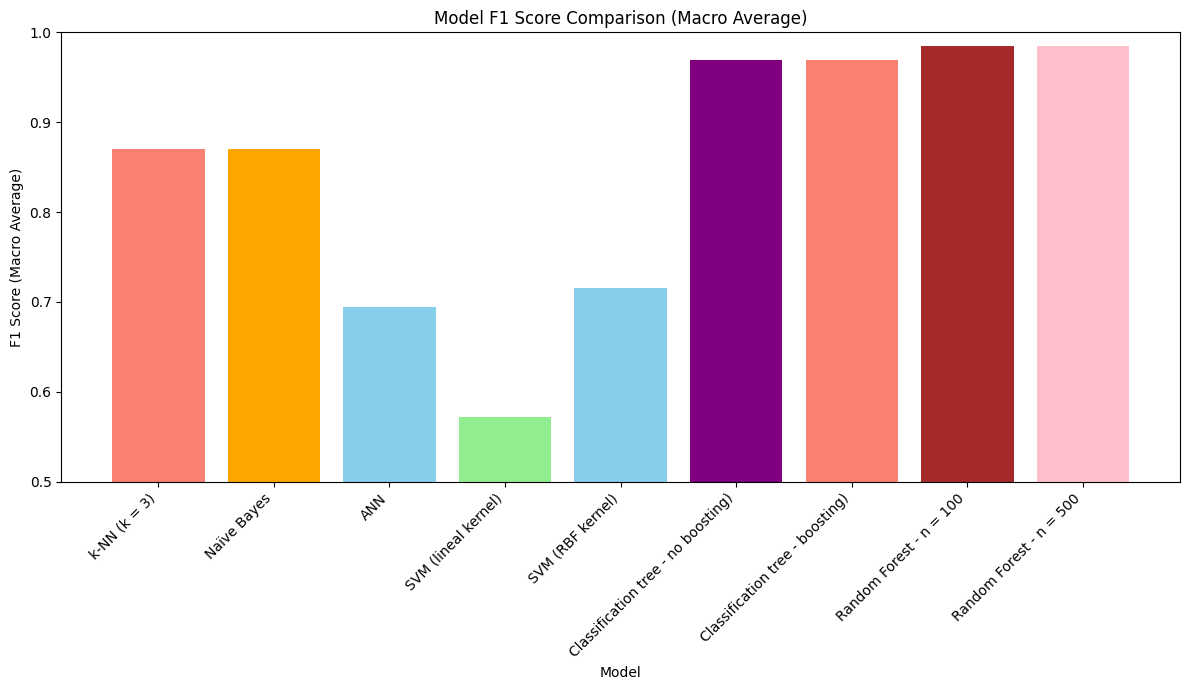

In [24]:
# Define a list of unique colors for each model
colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'purple', 'orange', 'brown', 'pink']

# Create a color map based on the model names from both dictionaries
all_model_names = list(scores.keys()) + list(f1.keys())
unique_model_names = sorted(list(set(all_model_names))) # Get unique names and sort them for consistent color assignment
color_map = {name: colors[i % len(colors)] for i, name in enumerate(unique_model_names)}


# Plot Accuracy scores
plt.figure(figsize=(12, 7))
# Assign colors based on the model names
plt.bar(scores.keys(), scores.values(), color=[color_map[name] for name in scores.keys()])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0.5, 1.0) # Set y-axis limit
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot F1 scores
plt.figure(figsize=(12, 7))
# Assign colors based on the model names
plt.bar(f1.keys(), f1.values(), color=[color_map[name] for name in f1.keys()])
plt.xlabel('Model')
plt.ylabel('F1 Score (Macro Average)')
plt.title('Model F1 Score Comparison (Macro Average)')
plt.ylim(0.5, 1.0)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

After reviewing all the models, it seems like the best performers have been the Random Forest and the Classification Trees, although the former accuracy is slightly better, and the F1 score is high for both!

On the next step, we have the k-Nearest Neighbours and Naïve Bayes algorithms, with an approximate accuracy of 0.9, and a pretty good F1-score. However, this models are oviuosly worse compared to the previous ones.

Lastly, we have the Artificial Neuron Network and the SVMs. The lowest accuracy score was returned by the ANN, that could've been improved by adding more layers to the network or fine-tunning the hyperparameters. It seemed quite sensible to the imbalanced data. On the other hand, although the SVMs accuracy are similar, the F1 score for the RBF kernel was significantly higher compared to the lineal kernel.

As a summary, the best performers were the Random Forest algorithms, with a slightly better performance when the number of trees is 500.



